**Kütüphanelerin kurulumu**

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, mean_absolute_error, accuracy_score

**Verinin eklenmesi**

In [ ]:
df = pd.read_csv("AygazMakineÖğrenmesi/insurance.csv")
data = df.copy()

**Verinin analizi**

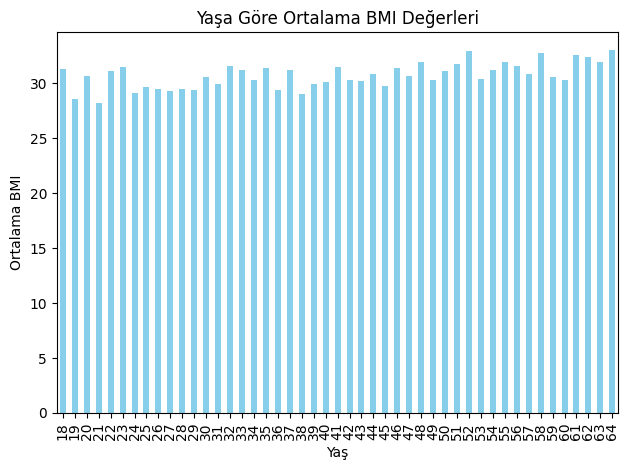

In [ ]:
# Bu kodda grafik ile yaşlara göre ortalama bmi değerlerini inceledik.
age_bmi_mean = data.groupby("age")["bmi"].mean()
age_bmi_mean.plot(kind="bar", color="skyblue")
plt.title("Yaşa Göre Ortalama BMI Değerleri")
plt.xlabel("Yaş")
plt.ylabel("Ortalama BMI")
plt.tight_layout()
plt.show()

Grafiğe göre her yaş grubunun ortalama bmi değerlerinin çok yüksek olduğunu ve her yaş grubunun bmi değerlerinin ortalamalarının
birbirlerine çok yakın olduğunu gördük.

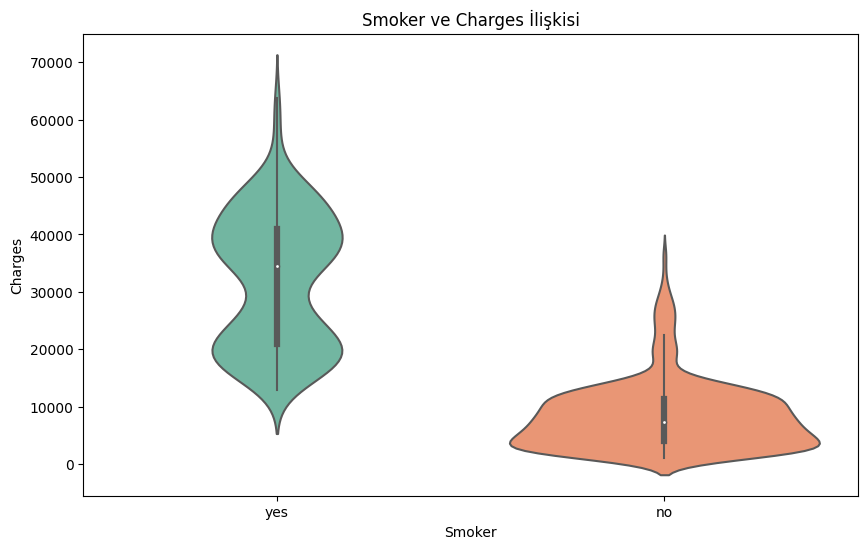

In [ ]:
# Bu kodda keman grafiğine göre beyaz noktaların yes ve no smoker değerlerinin ortalama charges değerini vermektedir.
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x=data.smoker, y=data.charges, palette="Set2")
plt.title("Smoker ve Charges İlişkisi")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

Grafikte gözlemlediğimiz gibi sigara içmeyenlerin sağlık harcamalarının içenlere oranla daha az olduğu görülmektedir.

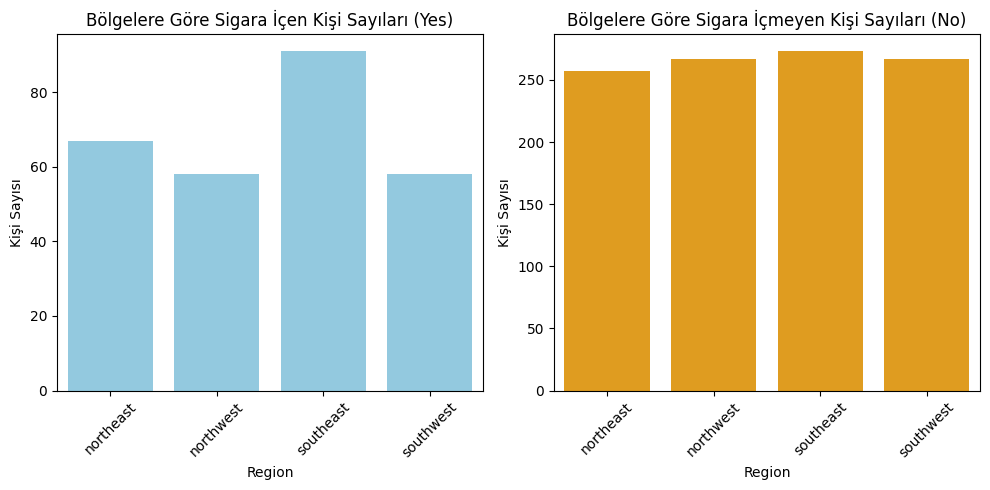

In [ ]:
# Bu kodda bölgelerin sigara içen sayılarını ve içmeyen sayılarını bar grafiği ile karşılaştırdık.
grouped_data_yes = data[data["smoker"] == "yes"].groupby("region").size()
grouped_data_no = data[data["smoker"] == "no"].groupby("region").size()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# Yes değeri için çubuk grafiği (ilk subplot)
sns.barplot(x=grouped_data_yes.index, y=grouped_data_yes.values, color="skyblue", ax=ax1)
ax1.set_title("Bölgelere Göre Sigara İçen Kişi Sayıları (Yes)")
ax1.set_xlabel("Region")
ax1.set_ylabel("Kişi Sayısı")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# No değeri için çubuk grafiği (ikinci subplot)
sns.barplot(x=grouped_data_no.index, y=grouped_data_no.values, color="orange", ax=ax2)
ax2.set_title("Bölgelere Göre Sigara İçmeyen Kişi Sayıları (No)")
ax2.set_xlabel("Region")
ax2.set_ylabel("Kişi Sayısı")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

Çizdirdiğimiz bu grafikte hangi bölgelerde ne kadar kişinin sigara içtiğini (En fazla southeast bölgesinde içen var.) ve bölgelerde sigara içmeyen kişilerin sayılarının ne kadar yakın olduklarını görebiliyoruz.

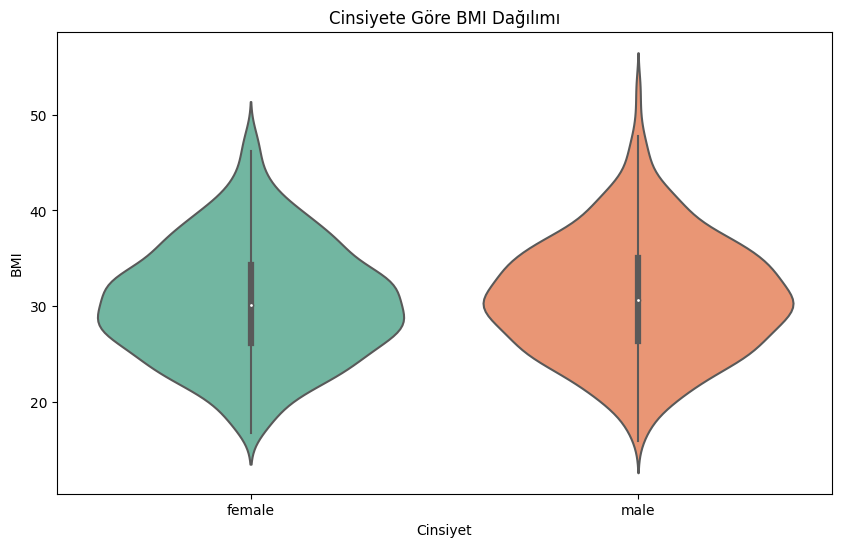

In [ ]:
#Bu kodda keman grafiği ile erkek ve kadınların vücut kitle endekslerinin karşılaştırmasını yaptık.
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x="sex", y="bmi", palette="Set2")
plt.title("Cinsiyete Göre BMI Dağılımı")
plt.xlabel("Cinsiyet")
plt.ylabel("BMI")
plt.show()

Grafiğe göre erkeklerin ve kadınların ortalama bmi değerlerinin neredeyse birbirine yakın olduğunu, erkeklerin ortalamasının biraz daha fazla ve bmi değerlerinin daha geniş bir aralığa yayıldığını görmekteyiz.

In [ ]:
# Bu kod bize bölgelere göre çocuk sayısını veriyor.
groupingForChilderen = data.groupby(["region"])["children"].size()
print(groupingForChilderen)

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: children, dtype: int64


Görünüşe göre en fazla çocuk sayısına sahip olan bölge 364 çocuk ile Southeast

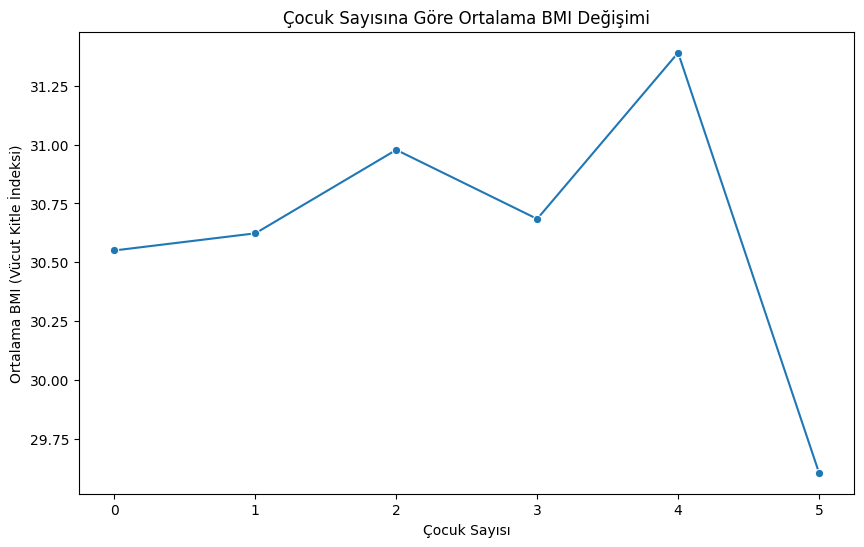

In [ ]:
# Veriyi çocuk sayısına göre grupla ve BMI ortalamalarını hesapla
avg_bmi_by_children = data.groupby("children")["bmi"].mean()

#Çizgi grafiği çizimi
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_bmi_by_children, marker="o")
plt.title("Çocuk Sayısına Göre Ortalama BMI Değişimi")
plt.xlabel("Çocuk Sayısı")
plt.ylabel("Ortalama BMI (Vücut Kitle İndeksi)")
plt.xticks(avg_bmi_by_children.index)
plt.show()

Çizilen grafiğe göre çocuk sayısı arttıkça bmi değerinin arttığı fakat 4 çocukta pik yapıp dörtten sonraki çocuk sayısı yani beşte bmi değerinin düştüğünü gözlemlemekteyiz.

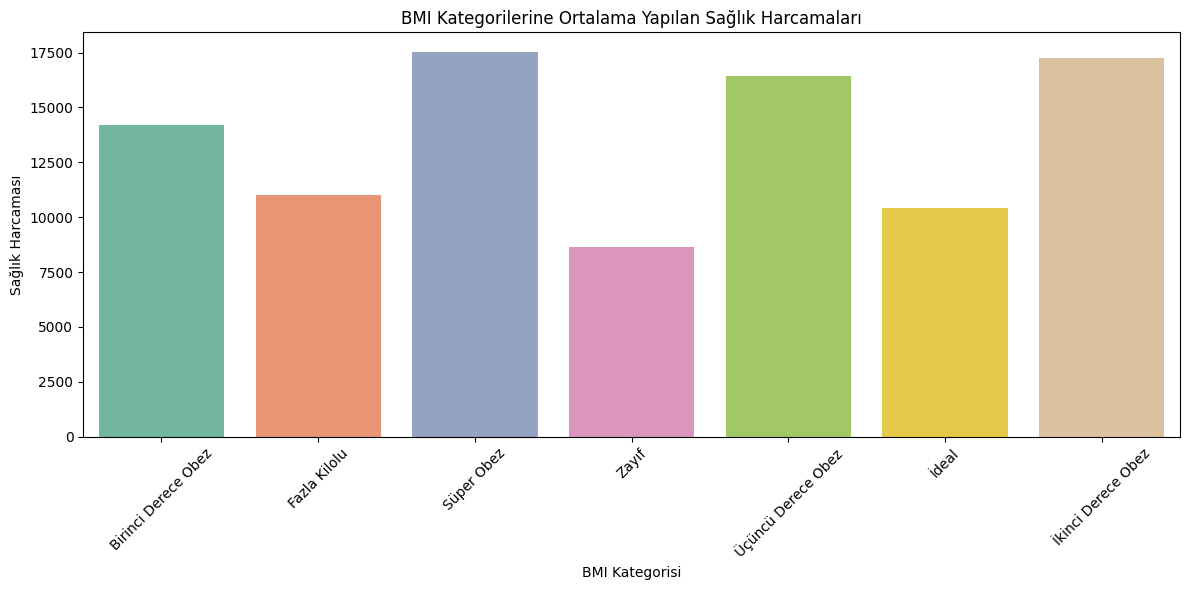

In [ ]:
# Bu kodda kişilerin bmi değerlerine göre kategoriledik ve bu kategorilerin ortalama yaptıkları harcamaları karşılaştırdık.
def categorize_bmi(bmi):
    if bmi <= 18.5:
        return "Zayıf"
    elif bmi <= 24.9:
        return "İdeal"
    elif bmi <= 29.9:
        return "Fazla Kilolu"
    elif bmi <= 34.9:
        return "Birinci Derece Obez"
    elif bmi <= 39.9:
        return "İkinci Derece Obez"
    elif bmi <= 44.9:
        return "Üçüncü Derece Obez"
    else:
        return "Süper Obez"

# BMI değerlerini kategorilere ayırma
data["bmi_category"] = data["bmi"].apply(categorize_bmi)

# Kategorilere göre charges değerlerinin ortalamasını hesapla
avg_charges_by_bmi_category = data.groupby("bmi_category")["charges"].mean()

# Çubuk grafiği çizimi
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_charges_by_bmi_category.index, y=avg_charges_by_bmi_category.values, palette="Set2")
plt.title("BMI Kategorilerine Ortalama Yapılan Sağlık Harcamaları")
plt.xlabel("BMI Kategorisi")
plt.ylabel("Sağlık Harcaması")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Kişilerin vücut kitle endekslerine göre karşılaştırma yaptığımız bu grafikte en fazla sağlık harcamasını süper obez kişilerin ve onlardan sonra en yakın ikinci derece obez kişilerin yaptığını en az sağlık harcamasını da zayıf kişilerin yaptığını gözlemlemekteyiz.

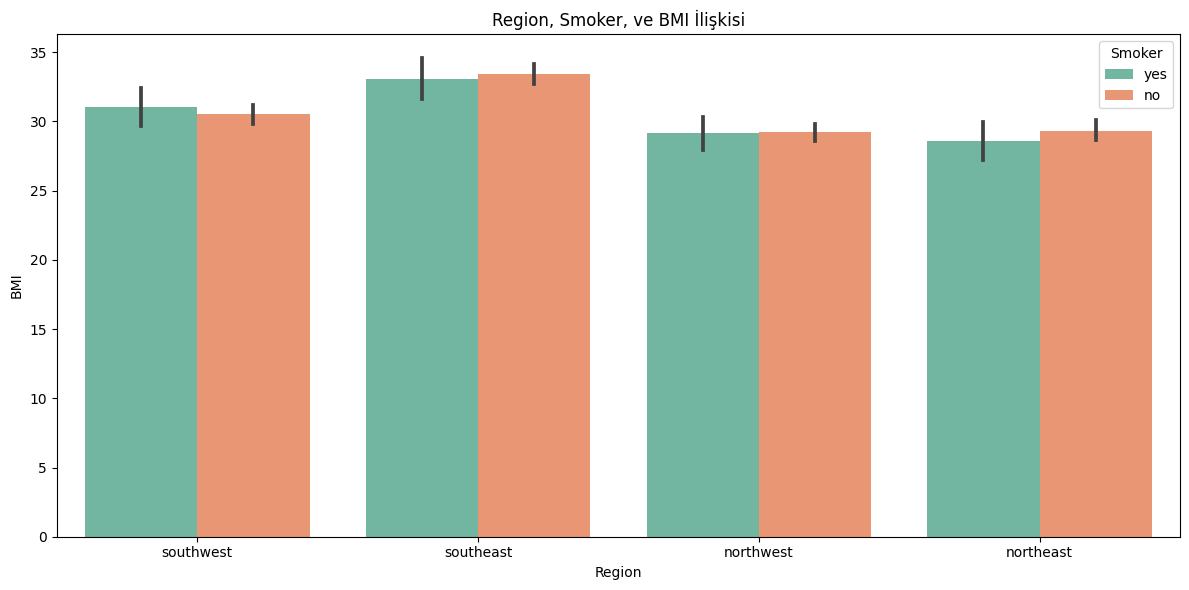

In [ ]:
# Bu grafikte sigara içenlerin ve içmeyenlerin kendi bölglerinde bmi değerlerini karşılaştırdık.
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x="region", y="bmi", hue="smoker", palette="Set2")
plt.title("Region, Smoker, ve BMI İlişkisi")
plt.xlabel("Region")
plt.ylabel("BMI")
plt.legend(title="Smoker")
plt.tight_layout()
plt.show()

Bölgelere göre sigara içen ve içmeyenlerin vücut kitle endekslerine baktığımızda sigara kullanmanın veya kullanmamanın bu veri setine göre değerler birbirlerine çok yakın olduğundançok fazla etki etmediğini görmekteyiz.

**x ve y parametrelerinin oluşturulması**

In [ ]:
x = data.drop("charges", axis=1)
y = data[["charges"]].values

**Verinin model tarafından daha rahat anlaşılması için encoderların yapılması**

In [ ]:
le = LabelEncoder()
x["sex"] = le.fit_transform(x["sex"])
x["smoker"] = le.fit_transform(x["smoker"])

ohe = OneHotEncoder()
region = x[["region"]]
x = x.drop("region", axis=1)
region = pd.DataFrame(data = ohe.fit_transform(region).toarray())
region = region.drop(region.columns[0], axis=1)

x = pd.concat([x, region], axis=1)

**Test ve train verilerinin ayrılması ve ölçeklendirilmesi**

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(x.values, y.ravel(), random_state=0, test_size=0.2)

sc = StandardScaler()
xtrain = sc.fit_transform(xtrain[:, [0, 1, 2, 3, 4, 6, 7]])
xtest = sc.transform(xtest[:, [0, 1, 2, 3, 4, 6, 7]])

**Model için oluşturulacak algoritmaların karışılaştırılması**

In [32]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=15, random_state=0)
crosValS = cross_val_score(estimator=rf, X=xtrain, y=ytrain, cv=5)
print("Doğruluk: %", crosValS.mean()*100)
print("Standart Sapma: %", crosValS.std()*100)

Doğruluk: % 80.42167735830225
Standart Sapma: % 2.418242902941664


In [34]:
# Lineer Regresyon
lier = LinearRegression()
crosValS = cross_val_score(estimator=lier, X=xtrain, y=ytrain, cv=5)
print("Doğruluk: %", crosValS.mean()*100)
print("Standart Sapma: %", crosValS.std()*100)

Doğruluk: % 73.0077574660714
Standart Sapma: % 2.1123672880451


In [35]:
# Dexision Tree algoritmasını karşılaştırdık.
dectReg = DecisionTreeRegressor(random_state=0)
crosValS = cross_val_score(estimator=dectReg, X=xtrain, y=ytrain, cv=5)
print("Doğruluk: %", crosValS.mean()*100)
print("Standart Sapma: %", crosValS.std()*100)

Doğruluk: % 66.89328790986025
Standart Sapma: % 2.5893783241554087


Sonuçların gösterdiği gibi seçilebilecek en iyi algoritma Random Forest

**Seçilen algoritmanın optimum değerlerini bulmak**

In [39]:
list = range(1,30)
parameters = {"n_estimators": list,
              "criterion": ['squared_error','friedman_mse', 'absolute_error', 'poisson'],
              }

gs = GridSearchCV(estimator=RandomForestRegressor(random_state=0), param_grid=parameters, scoring="neg_mean_squared_error", cv=10, n_jobs=-1)

gridSearch = gs.fit(xtrain, ytrain)
bestResult = gridSearch.best_score_
bestParameters = gridSearch.best_params_
print(bestParameters)

{'criterion': 'squared_error', 'n_estimators': 24}


Bu sonuca göre n_estimators=24, criterion='squared_error' değerleri en optimum değerler.

In [40]:
# Modelin eğitimi ve tahmini

rf = RandomForestRegressor(random_state=0, n_estimators=24, criterion="squared_error")
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

**Modelin gerçek değerden ne kadar uzak olduğunu veren bir grafik çizelim**

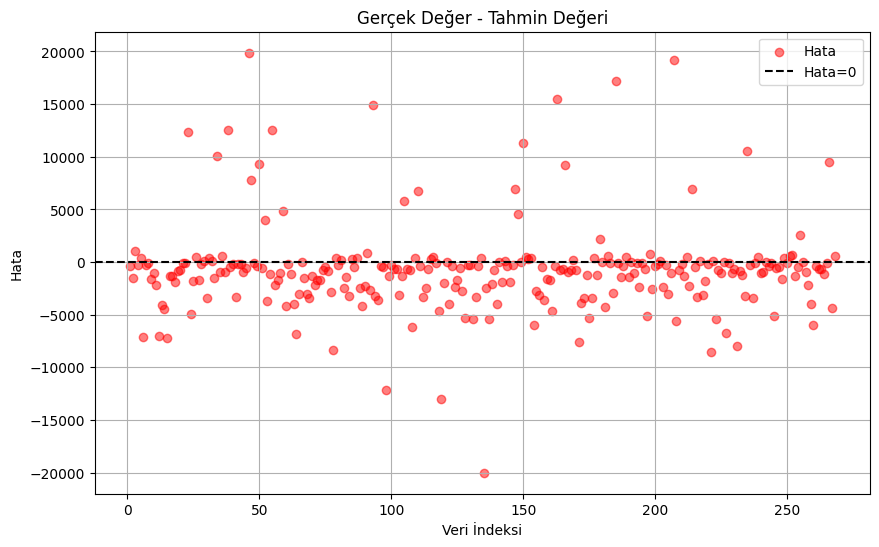

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(range(1, len(ytest) + 1), ytest - ypred, alpha=0.5, c="red", label="Hata")
plt.axhline(y=0, color='black', linestyle='--', label="Hata=0")
plt.title('Gerçek Değer - Tahmin Değeri')
plt.xlabel('Veri İndeksi')
plt.ylabel('Hata')
plt.legend()
plt.grid(True)
plt.show()

Modelin gerçek değere çok yakın sonuçlar verdiğini, genellikle gerçek harcamadan 5000$ az tahmin ettiğini ve maksimum 20000$ sapma olduğunu görmekteyiz.

In [48]:
mse = mean_absolute_error(ytest, ypred)
print("Ortalama Mutlak Hatası:", mse)

Ortalama Mutlak Hatası: 2597.411368647414


Bu kodda ise yapılan harcamaların tahmininin ortalama ne kadar saptığını görmekteyiz.